# Final Project
### Dataset:
https://archive.ics.uci.edu/ml/datasets/adult  
Classifying: >50K, <=50K.  

**age:** continuous.  
**workclass:** Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.  
**fnlwgt:** continuous.  
**education:** Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.  
**education-num:** continuous.  
**marital-status:** Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.  
**occupation:** Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.  
**relationship:** Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.  
**race:** White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.  
**sex:** Female, Male.  
**capital-gain:** continuous.  
**capital-loss:** continuous.  
**hours-per-week:** continuous.  
**native-country:** United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [51]:
# Imports
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import *
from scipy.stats import chisquare

In [38]:
data = pd.read_csv("adult.csv")
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


### Data Cleaning
* Strip whitespace from column names and values

In [39]:
old_data_types = data.dtypes
data.columns = data.columns.str.strip()
data = data.apply(lambda x : x.astype(str).str.strip(' .') if not pd.api.types.is_int64_dtype(x) else x)

In [40]:
value_instances = data.apply(lambda x : dict(x.value_counts()))

In [59]:
print(value_instances['marital-status'])
print(value_instances['relationship'])


{'Married-civ-spouse': 22379, 'Never-married': 16117, 'Divorced': 6633, 'Separated': 1530, 'Widowed': 1518, 'Married-spouse-absent': 628, 'Married-AF-spouse': 37}
{'Husband': 19716, 'Not-in-family': 12583, 'Own-child': 7581, 'Unmarried': 5125, 'Wife': 2331, 'Other-relative': 1506}


In [58]:
# https://medium.com/@outside2SDs/an-overview-of-correlation-measures-between-categorical-and-continuous-variables-4c7f85610365
clf_edu = linear_model.LogisticRegression().fit(np.array(data['education-num']).reshape(-1, 1), 
                                                data['education'])

c:\users\pika-sannnnn\appdata\local\programs\python\python38\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


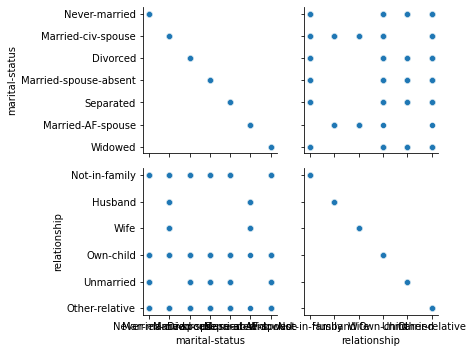

In [50]:
# data_pg_marital = sns.PairGrid(data, vars=['marital-status', 'relationship'])
# data_pg_marital.map(sns.scatterplot)

In [55]:
# np.corrcoef(data['education-num'], data['education'])